
# Object Detection Model, using YOLO v8. Case: Invertebrate Fossils
## By: Muhammad Ziad
---



Object Detection Using YOLO v8: How it works?

Illustration:
(images)

YOLO v8 Model Architecture:

# 1. Importing and Installing required module for the Models

In [ ]:
import os
import shutil
import random

In [ ]:
import re
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 932.6/932.6 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 69.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 47.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 80.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
cd /content/drive/MyDrive/Object_Detection_Model/

/content/drive/MyDrive/Object_Detection_Model


In [ ]:
ls /content/drive/MyDrive/Object_Detection_Model/

datasets/  Notebook_Object_Detection.ipynb


# Data Preparation - Creating Folder which will be used later

In [ ]:
# Data Preparation - Creating Folder which will be used later

base_dir = '/content/drive/MyDrive/Object_Detection_Model/'

# folder train, val, dan test
os.makedirs(base_dir + 'train', exist_ok=True)
os.makedirs(base_dir + 'val', exist_ok=True)
os.makedirs(base_dir + 'test', exist_ok=True)

# Category: Fossils dataset
categories = ['Ammonites', 'Belemnites', 'Corals', 'Crinoids', 'Trilobites']

# Subfolder for each category
for category in categories:
    os.makedirs(base_dir + 'train/' + category, exist_ok=True)
    os.makedirs(base_dir + 'val/' + category, exist_ok=True)
    os.makedirs(base_dir + 'test/' + category, exist_ok=True)

In [ ]:
# Splitting data function
def split_data(category, train_ratio=0.8, val_ratio=0.1, test_ratio=0.1):
    category_path = os.path.join(base_dir, 'datasets', category)
    files = os.listdir(category_path)
    random.shuffle(files)

    # validate by check the result of data splitting
    train_count = int(len(files) * train_ratio)
    val_count = int(len(files) * val_ratio)

    # Copy file ke folder train, val, dan test
    for i, file in enumerate(files):
        if i < train_count:
            shutil.copy(os.path.join(category_path, file), os.path.join(base_dir, 'train', category, file))
        elif i < train_count + val_count:
            shutil.copy(os.path.join(category_path, file), os.path.join(base_dir, 'val', category, file))
        else:
            shutil.copy(os.path.join(category_path, file), os.path.join(base_dir, 'test', category, file))

In [ ]:
# Membagi data untuk setiap kategori
for category in categories:
    split_data(category)

print("Data Splitting done!")

Data Splitting done!


## 3. Model Training

In [ ]:
model = YOLO('yolov8s-cls.pt')

In [ ]:
# load pretrained / baseline model
results = model.train(data='/content/drive/MyDrive/Object_Detection_Model/', epochs=10, batch=32)

Ultralytics 8.3.89 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=classify, mode=train, model=yolov8s-cls.pt, data=/content/drive/MyDrive/Object_Detection_Model/, epochs=10, time=None, patience=100, batch=32, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, sh

train: Scanning /content/drive/MyDrive/Object_Detection_Model/train... 800 images, 0 corrupt: 100%|██████████| 800/800 [00:04<00:00, 178.68it/s]


train: New cache created: /content/drive/MyDrive/Object_Detection_Model/train.cache


val: Scanning /content/drive/MyDrive/Object_Detection_Model/val... 100 images, 0 corrupt: 100%|██████████| 100/100 [00:00<00:00, 155.00it/s]


val: New cache created: /content/drive/MyDrive/Object_Detection_Model/val.cache
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 0 dataloader workers
Logging results to runs/classify/train4
Starting training for 10 epochs...

      Epoch    GPU_mem       loss  Instances       Size


       1/10         0G      1.751         32        224:   4%|▍         | 1/25 [00:08<03:17,  8.24s/it]


100%|██████████| 755k/755k [00:00<00:00, 9.37MB/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:06<00:00,  3.17s/it]

                   all       0.98          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:06<00:00,  3.31s/it]

                   all       0.98          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:06<00:00,  3.44s/it]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:07<00:00,  3.63s/it]

                   all       0.99          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:12<00:00,  6.37s/it]

                   all       0.99          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:07<00:00,  3.67s/it]

                   all       0.99          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:06<00:00,  3.38s/it]

                   all       0.97          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:07<00:00,  3.61s/it]

                   all       0.96          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:07<00:00,  3.80s/it]

                   all       0.98          1



      Epoch    GPU_mem       loss  Instances       Size


      10/10         0G    0.01508         32        224: 100%|██████████| 25/25 [02:15<00:00,  5.40s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:07<00:00,  3.96s/it]

                   all       0.99          1



10 epochs completed in 0.409 hours.
Optimizer stripped from runs/classify/train4/weights/last.pt, 10.3MB
Optimizer stripped from runs/classify/train4/weights/best.pt, 10.3MB

Validating runs/classify/train4/weights/best.pt...
Ultralytics 8.3.89 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)
YOLOv8s-cls summary (fused): 30 layers, 5,081,605 parameters, 0 gradients, 12.5 GFLOPs
train: /content/drive/MyDrive/Object_Detection_Model/train... found 800 images in 5 classes ✅ 
val: /content/drive/MyDrive/Object_Detection_Model/val... found 100 images in 5 classes ✅ 
test: /content/drive/MyDrive/Object_Detection_Model/test... found 100 images in 5 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:06<00:00,  3.24s/it]


                   all       0.99          1
Speed: 0.0ms preprocess, 38.5ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train4


---
# 4. Model Evaluation

In [ ]:
# inputin best trained model (to best path)
model = YOLO('/content/drive/MyDrive/Object_Detection_Model/runs/classify/train4/weights/best.pt')  # ganti dengan path ke model yang telah dilatih

Extracted Epochs: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Training Losses: [1.268, 0.2467, 0.05108, 0.03626, 0.03357, 0.03297, 0.02243, 0.03224, 0.01349, 0.01508]
Validation Metrics Score: [0.98, 0.98, 1.0, 0.99, 0.99, 0.99, 0.97, 0.96, 0.98, 0.99]


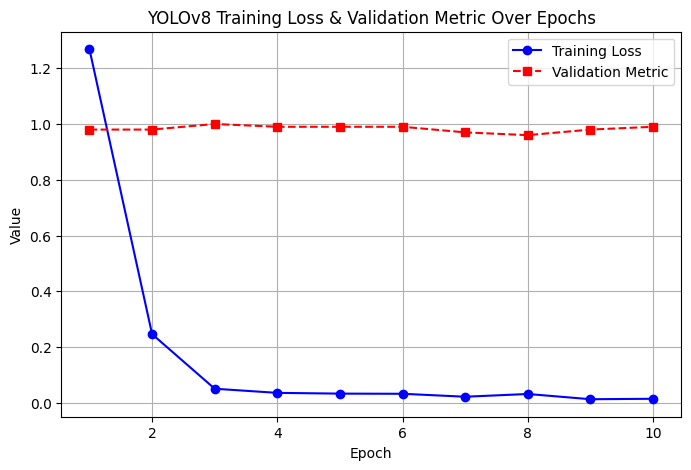

In [ ]:
# Check training loss validation

# This is your raw log output as a single multiline string.
log_text = """
Starting training for 10 epochs...

      Epoch    GPU_mem       loss  Instances       Size
       1/10         0G      1.268         32        224: 100%|██████████| 25/25 [02:33<00:00,  6.13s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:06<00:00,  3.17s/it]                   all       0.98          1


      Epoch    GPU_mem       loss  Instances       Size
       2/10         0G     0.2467         32        224: 100%|██████████| 25/25 [02:18<00:00,  5.54s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:06<00:00,  3.31s/it]                   all       0.98          1


      Epoch    GPU_mem       loss  Instances       Size
       3/10         0G    0.05108         32        224: 100%|██████████| 25/25 [02:17<00:00,  5.52s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:06<00:00,  3.44s/it]                   all          1          1


      Epoch    GPU_mem       loss  Instances       Size
       4/10         0G    0.03626         32        224: 100%|██████████| 25/25 [02:21<00:00,  5.65s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:07<00:00,  3.63s/it]                   all       0.99          1


      Epoch    GPU_mem       loss  Instances       Size
       5/10         0G    0.03357         32        224: 100%|██████████| 25/25 [02:16<00:00,  5.45s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:12<00:00,  6.37s/it]                   all       0.99          1


      Epoch    GPU_mem       loss  Instances       Size
       6/10         0G    0.03297         32        224: 100%|██████████| 25/25 [02:18<00:00,  5.53s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:07<00:00,  3.67s/it]                   all       0.99          1


      Epoch    GPU_mem       loss  Instances       Size
       7/10         0G    0.02243         32        224: 100%|██████████| 25/25 [02:16<00:00,  5.46s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:06<00:00,  3.38s/it]                   all       0.97          1


      Epoch    GPU_mem       loss  Instances       Size
       8/10         0G    0.03224         32        224: 100%|██████████| 25/25 [02:20<00:00,  5.61s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:07<00:00,  3.61s/it]                   all       0.96          1


      Epoch    GPU_mem       loss  Instances       Size
       9/10         0G    0.01349         32        224: 100%|██████████| 25/25 [02:14<00:00,  5.39s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:07<00:00,  3.80s/it]                   all       0.98          1


      Epoch    GPU_mem       loss  Instances       Size
      10/10         0G    0.01508         32        224: 100%|██████████| 25/25 [02:15<00:00,  5.40s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:07<00:00,  3.96s/it]                   all       0.99          1


"""

# Pattern to extract the epoch number and the training loss from the first line of each epoch block.
epoch_loss_pattern = r"^\s*(\d+)/10\s+\S+\s+([\d\.]+)"
# Pattern to extract the validation metric (the "all" value) from the evaluation line.
val_metric_pattern = r"all\s+([\d\.]+)"

# Use re.MULTILINE to search across lines.
loss_matches = re.findall(epoch_loss_pattern, log_text, re.MULTILINE)
val_matches = re.findall(val_metric_pattern, log_text)

# Convert extracted values to proper types:
epochs = [int(match[0]) for match in loss_matches]
training_losses = [float(match[1]) for match in loss_matches]
validation_metrics = [float(val) for val in val_matches]

print("Extracted Epochs:", epochs)
print("Training Losses:", training_losses)
print("Validation Metrics Score:", validation_metrics)

# For example, plot the results:
plt.figure(figsize=(8, 5))
plt.plot(epochs, training_losses, marker='o', linestyle='-', color='blue', label='Training Loss')
plt.plot(epochs, validation_metrics, marker='s', linestyle='--', color='red', label='Validation Metric')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('YOLOv8 Training Loss & Validation Metric Over Epochs')
plt.legend()
plt.grid(True)
plt.savefig("/content/drive/MyDrive/Object_Detection_Model/Training_loss_vs_val_metric.png")
plt.show()


There are somethng with this dataset, we will to try other method instead

# K-Fold Splitting method (save for later)

In [ ]:
from sklearn.model_selection import KFold
import glob
import yaml

In [ ]:
# Set the project directory and train folder (update as needed)
project_dir = '/content/drive/MyDrive/DL_Object_Detection'
train_dir = os.path.join(project_dir, 'train')

# Gather image paths recursively from the train folder (adjust extensions as needed)
extensions = ['*.jpg', '*.jpeg', '*.png']
data = []
for ext in extensions:
    for filepath in glob.glob(os.path.join(train_dir, '**', ext), recursive=True):
        # Expect folder structure: train/<class_name>/filename.ext
        rel_path = os.path.relpath(filepath, start=train_dir)
        parts = rel_path.split(os.sep)
        if len(parts) >= 2:
            class_name = parts[0]
            data.append((filepath, class_name))

num_images = len(data)
print(f"Total training images found: {num_images}")

if num_images < 10:
    raise ValueError("Too few images for reliable cross validation. Please check your dataset.")

num_images = len(data)
print(f"Total training images found: {num_images}")

Total training images found: 993
Total training images found: 993


In [ ]:
# Build sorted set of class names and mapping
class_names = sorted(list({label for _, label in data}))
class_to_int = {name: i for i, name in enumerate(class_names)}
print("Classes found:", class_to_int)

Classes found: {'Ammonites': 0, 'Belemnites': 1, 'Corals': 2, 'Crinoids': 3, 'Trilobites': 4}


In [ ]:
# Set up KFold cross validation (e.g., 5-fold)
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

fold_idx = 1
fold_results = {}

# Create a directory to store fold directories
folds_dir = os.path.join(project_dir, 'folds')
os.makedirs(folds_dir, exist_ok=True)

fold_idx = 1
fold_results = {}

In [ ]:
# Split data using KFold
for train_idx, val_idx in kf.split(data):
    # Prepare lists for training and validation image tuples
    train_data = [data[i] for i in train_idx]
    val_data = [data[i] for i in val_idx]

    # Create fold directory structure: folds/fold_<i>/train and folds/fold_<i>/val
    fold_dir = os.path.join(folds_dir, f'fold_{fold_idx}')
    train_fold_dir = os.path.join(fold_dir, 'train')
    val_fold_dir = os.path.join(fold_dir, 'val')
    os.makedirs(train_fold_dir, exist_ok=True)
    os.makedirs(val_fold_dir, exist_ok=True)

    # Create subdirectories for each class in both train and val folders
    for cls in class_names:
        os.makedirs(os.path.join(train_fold_dir, cls), exist_ok=True)
        os.makedirs(os.path.join(val_fold_dir, cls), exist_ok=True)

    # Copy training images
    for img_path, cls in train_data:
        dest = os.path.join(train_fold_dir, cls, os.path.basename(img_path))
        shutil.copy(img_path, dest)

    # Copy validation images
    for img_path, cls in val_data:
        dest = os.path.join(val_fold_dir, cls, os.path.basename(img_path))
        shutil.copy(img_path, dest)

    print(f"Fold {fold_idx}: {len(train_data)} training images, {len(val_data)} validation images")

    model = YOLO('yolov8s-cls.pt')
    print(f"Training on fold {fold_idx}...")
    res = model.train(data=fold_dir, epochs=20, batch=32, imgsz=224)
    fold_results[f"fold_{fold_idx}"] = res

    fold_idx += 1

print("Cross Validation Complete. Check the Results below:")

Fold 1: 794 training images, 199 validation images
Training on fold 1...
Ultralytics 8.3.89 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=classify, mode=train, model=yolov8s-cls.pt, data=/content/drive/MyDrive/DL_Object_Detection/folds/fold_1, epochs=20, time=None, patience=100, batch=32, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_fr

train: Scanning /content/drive/MyDrive/DL_Object_Detection/folds/fold_1/train... 993 images, 0 corrupt: 100%|██████████| 993/993 [00:07<00:00, 136.92it/s]


train: New cache created: /content/drive/MyDrive/DL_Object_Detection/folds/fold_1/train.cache


val: Scanning /content/drive/MyDrive/DL_Object_Detection/folds/fold_1/val... 993 images, 0 corrupt: 100%|██████████| 993/993 [00:06<00:00, 144.24it/s]


val: New cache created: /content/drive/MyDrive/DL_Object_Detection/folds/fold_1/val.cache
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 0 dataloader workers
Logging results to runs/classify/train5
Starting training for 20 epochs...

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [01:15<00:00,  4.73s/it]

                   all      0.983          1

      Epoch    GPU_mem       loss  Instances       Size



               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [01:17<00:00,  4.83s/it]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [01:11<00:00,  4.46s/it]

                   all      0.999          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [01:14<00:00,  4.68s/it]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [01:11<00:00,  4.48s/it]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [01:10<00:00,  4.42s/it]

                   all      0.998          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [01:16<00:00,  4.79s/it]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [01:07<00:00,  4.25s/it]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [01:11<00:00,  4.45s/it]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      10/20         0G    0.02588          1        224: 100%|██████████| 32/32 [03:04<00:00,  5.75s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [01:14<00:00,  4.68s/it]

                   all      0.998          1



      Epoch    GPU_mem       loss  Instances       Size


      11/20         0G    0.05402          1        224: 100%|██████████| 32/32 [02:59<00:00,  5.60s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [01:11<00:00,  4.47s/it]

                   all      0.999          1



      Epoch    GPU_mem       loss  Instances       Size


      12/20         0G    0.03249          1        224: 100%|██████████| 32/32 [02:56<00:00,  5.52s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [01:20<00:00,  5.02s/it]

                   all      0.999          1



      Epoch    GPU_mem       loss  Instances       Size


      13/20         0G      0.099          1        224: 100%|██████████| 32/32 [02:56<00:00,  5.50s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [01:11<00:00,  4.47s/it]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      14/20         0G    0.04425          1        224: 100%|██████████| 32/32 [02:58<00:00,  5.58s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [01:11<00:00,  4.48s/it]

                   all      0.999          1



      Epoch    GPU_mem       loss  Instances       Size


      15/20         0G     0.1153          1        224: 100%|██████████| 32/32 [02:55<00:00,  5.49s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [01:16<00:00,  4.81s/it]

                   all      0.999          1



      Epoch    GPU_mem       loss  Instances       Size


      16/20         0G    0.06392          1        224: 100%|██████████| 32/32 [02:59<00:00,  5.61s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [01:11<00:00,  4.45s/it]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      17/20         0G     0.0412          1        224: 100%|██████████| 32/32 [02:57<00:00,  5.54s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [01:10<00:00,  4.42s/it]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      18/20         0G    0.03605          1        224: 100%|██████████| 32/32 [02:59<00:00,  5.61s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [01:11<00:00,  4.48s/it]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      19/20         0G    0.09964          1        224: 100%|██████████| 32/32 [02:59<00:00,  5.61s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [01:16<00:00,  4.79s/it]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      20/20         0G    0.06402          1        224: 100%|██████████| 32/32 [02:59<00:00,  5.60s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [01:12<00:00,  4.53s/it]

                   all          1          1



20 epochs completed in 1.404 hours.
Optimizer stripped from runs/classify/train5/weights/last.pt, 10.3MB
Optimizer stripped from runs/classify/train5/weights/best.pt, 10.3MB

Validating runs/classify/train5/weights/best.pt...
Ultralytics 8.3.89 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)
YOLOv8s-cls summary (fused): 30 layers, 5,081,605 parameters, 0 gradients, 12.5 GFLOPs
train: /content/drive/MyDrive/DL_Object_Detection/folds/fold_1/train... found 993 images in 5 classes ✅ 
val: /content/drive/MyDrive/DL_Object_Detection/folds/fold_1/val... found 993 images in 5 classes ✅ 
test: None...


               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [01:08<00:00,  4.26s/it]


                   all          1          1
Speed: 0.0ms preprocess, 40.3ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train5
Fold 2: 794 training images, 199 validation images
Training on fold 2...
Ultralytics 8.3.89 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=classify, mode=train, model=yolov8s-cls.pt, data=/content/drive/MyDrive/DL_Object_Detection/folds/fold_2, epochs=20, time=None, patience=100, batch=32, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True,

train: Scanning /content/drive/MyDrive/DL_Object_Detection/folds/fold_2/train... 794 images, 0 corrupt: 100%|██████████| 794/794 [00:06<00:00, 130.02it/s]


train: New cache created: /content/drive/MyDrive/DL_Object_Detection/folds/fold_2/train.cache


val: Scanning /content/drive/MyDrive/DL_Object_Detection/folds/fold_2/val... 199 images, 0 corrupt: 100%|██████████| 199/199 [00:01<00:00, 170.24it/s]

val: New cache created: /content/drive/MyDrive/DL_Object_Detection/folds/fold_2/val.cache


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 0 dataloader workers
Logging results to runs/classify/train6
Starting training for 20 epochs...

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:15<00:00,  3.81s/it]

                   all       0.96          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:15<00:00,  3.96s/it]

                   all      0.985          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:14<00:00,  3.60s/it]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:14<00:00,  3.72s/it]

                   all       0.99          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:19<00:00,  4.89s/it]

                   all      0.985          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:14<00:00,  3.65s/it]

                   all       0.99          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:15<00:00,  3.86s/it]

                   all      0.985          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:15<00:00,  3.90s/it]

                   all       0.98          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:16<00:00,  4.07s/it]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


      10/20         0G    0.02714         26        224: 100%|██████████| 25/25 [02:20<00:00,  5.64s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:14<00:00,  3.62s/it]

                   all       0.99          1



      Epoch    GPU_mem       loss  Instances       Size


      11/20         0G    0.02271         26        224: 100%|██████████| 25/25 [02:23<00:00,  5.76s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:15<00:00,  3.92s/it]

                   all       0.99          1



      Epoch    GPU_mem       loss  Instances       Size


      12/20         0G    0.03002         26        224: 100%|██████████| 25/25 [02:20<00:00,  5.61s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:14<00:00,  3.62s/it]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


      13/20         0G    0.01655         26        224: 100%|██████████| 25/25 [02:20<00:00,  5.63s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:14<00:00,  3.63s/it]

                   all       0.99          1



      Epoch    GPU_mem       loss  Instances       Size


      14/20         0G    0.02212         26        224: 100%|██████████| 25/25 [02:22<00:00,  5.69s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:14<00:00,  3.68s/it]

                   all      0.995          1

      Epoch    GPU_mem       loss  Instances       Size



      15/20         0G   0.008761         26        224: 100%|██████████| 25/25 [02:19<00:00,  5.58s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:14<00:00,  3.60s/it]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


      16/20         0G     0.0107         26        224: 100%|██████████| 25/25 [02:20<00:00,  5.62s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:14<00:00,  3.62s/it]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


      17/20         0G    0.01006         26        224: 100%|██████████| 25/25 [02:21<00:00,  5.66s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:15<00:00,  3.92s/it]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      18/20         0G    0.01475         26        224: 100%|██████████| 25/25 [02:21<00:00,  5.66s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:13<00:00,  3.50s/it]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      19/20         0G     0.0109         26        224: 100%|██████████| 25/25 [02:21<00:00,  5.64s/it]
               classes   top1_acc   top5_acc:  25%|██▌       | 1/4 [00:11<00:35, 11.98s/it]


KeyboardInterrupt: 

In [ ]:
for fold, res in fold_results.items():
    print(f"{fold}: {res}")

Training on fold 1...
Ultralytics 8.3.89 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=classify, mode=train, model=yolov8s-cls.pt, data=/content/drive/MyDrive/DL_Object_Detection/folds/fold_1/data.yaml, epochs=20, time=None, patience=100, batch=32, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=Fal

RuntimeError: Dataset '/content/drive/MyDrive/DL_Object_Detection/folds/fold_1/data.yaml' error ❌ [Errno 20] Not a directory: '/content/drive/MyDrive/DL_Object_Detection/folds/fold_1/data.yaml/train'

In [ ]:
'''
# Create a list of tuples: (relative_path, label) and KFold Cross-Validation
data = []
for p in rel_image_paths:
    parts = os.path.normpath(p).split(os.sep)
    if len(parts) >= 2:
        label = class_to_int[parts[1]]
        data.append((p, label))

# For K-Fold cross validation, we will split the list of image paths (ignoring labels in the split)
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
'''

In [ ]:
'''
fold_idx = 1
fold_results = {}
for train_idx, val_idx in kf.split(data):
    train_files = [data[i][0] for i in train_idx]  # list of relative file paths for training
    val_files = [data[i][0] for i in val_idx]      # list of relative file paths for validation

    # Build YAML dictionary – here, 'train' and 'val' are lists of file paths.
    # YOLOv8 accepts lists as well as directory paths.
    fold_yaml = {
        'train': train_files,
        'val': val_files,
        'names': {i: name for i, name in enumerate(class_names)}
    }

    yaml_filename = os.path.join(project_dir, f'fold_{fold_idx}_data.yaml')
    with open(yaml_filename, 'w') as f:
        yaml.dump(fold_yaml, f)

    print(f"Fold {fold_idx}: {len(train_files)} training images, {len(val_files)} validation images")
    fold_idx += 1

print("YAML files generated for each fold in your project directory.")
'''

Fold 1: 794 training images, 199 validation images
Fold 2: 794 training images, 199 validation images
Fold 3: 794 training images, 199 validation images
Fold 4: 795 training images, 198 validation images
Fold 5: 795 training images, 198 validation images
YAML files generated for each fold in your project directory.


In [ ]:
'''
model = YOLO('yolov8s-cls.pt')  # or your preferred model weight
# Train on fold 1
res_1 = model.train(data='/content/drive/MyDrive/DL_Object_Detection/fold_1_data.yaml', epochs=20, batch = 32)

# Train on fold 1
res_2 = model.train(data='/content/drive/MyDrive/DL_Object_Detection/fold_2_data.yaml', epochs=20, batch = 32)

# Train on fold 3
res_3 = model.train(data='/content/drive/MyDrive/DL_Object_Detection/fold_3_data.yaml', epochs=20, batch = 32)

# Train on fold 4
res_4 = model.train(data='/content/drive/MyDrive/DL_Object_Detection/fold_4_data.yaml', epochs=20, batch = 32)

# Train on fold 5
res_5 = model.train(data='/content/drive/MyDrive/DL_Object_Detection/fold_5_data.yaml', epochs=20, batch = 32)
'''

Ultralytics 8.3.89 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=classify, mode=train, model=yolov8s-cls.pt, data=/content/drive/MyDrive/DL_Object_Detection/fold_1_data.yaml, epochs=20, time=None, patience=100, batch=32, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_la

RuntimeError: Dataset '/content/drive/MyDrive/DL_Object_Detection/fold_1_data.yaml' error ❌ [Errno 20] Not a directory: '/content/drive/MyDrive/DL_Object_Detection/fold_1_data.yaml/train'

# Evaluate Model

In [ ]:
# Evaluasi model pada dataset validasi
res = model.val(data="/content/drive/MyDrive/Object_Detection_Model/")

Ultralytics 8.3.89 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)
train: /content/drive/MyDrive/Object_Detection_Model/train... found 800 images in 5 classes ✅ 
val: /content/drive/MyDrive/Object_Detection_Model/val... found 100 images in 5 classes ✅ 
test: /content/drive/MyDrive/Object_Detection_Model/test... found 100 images in 5 classes ✅ 


val: Scanning /content/drive/MyDrive/Object_Detection_Model/val... 100 images, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:07<00:00,  1.13s/it]


                   all       0.99          1
Speed: 0.0ms preprocess, 47.8ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/val2


In [ ]:
print(res)

ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78da8218ba10>
curves: []
curves_results: []
fitness: 0.9950000047683716
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.9900000095367432, 'metrics/accuracy_top5': 1.0, 'fitness': 0.9950000047683716}
save_dir: PosixPath('runs/classify/val2')
speed: {'preprocess': 0.0013201799947637483, 'inference': 47.8152877499997, 'loss': 0.00011854000149469357, 'postprocess': 0.00035615999877336435}
task: 'classify'
top1: 0.9900000095367432
top5: 1.0


*   Top-1 Accuracy: 99 persen, Artinya model benar menebak label pada urutan pertama sekitar 100% dari data.
*   Top-5 Accuracy: 100 persen, Model selalu memuat label yang benar dalam 5 prediksi teratas.
*   Fitness: 99.5 persen ,Menunjukkan kinerja model yang baik secara keseluruhan.
*   Confusion Matrix: Menampilkan distribusi kesalahan dan prediksi model per kelas

# 5. Predicting Test Dataset from Model

In [ ]:
# Melakukan input gambar
res_mod = model.predict('/content/drive/MyDrive/Object_Detection_Model/test/Trilobites/Trilobite134.jpg')  # ganti dengan path gambar trilobite

# Menampilkan hasil prediksi
print(res_mod)


image 1/1 /content/drive/MyDrive/Object_Detection_Model/test/Trilobites/Trilobite134.jpg: 224x224 Trilobites 1.00, Crinoids 0.00, Ammonites 0.00, Corals 0.00, Belemnites 0.00, 130.1ms
Speed: 8.3ms preprocess, 130.1ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
[ultralytics.engine.results.Results object with attributes:

boxes: None
keypoints: None
masks: None
names: {0: 'Ammonites', 1: 'Belemnites', 2: 'Corals', 3: 'Crinoids', 4: 'Trilobites'}
obb: None
orig_img: array([[[ 31,  39,  42],
        [ 27,  34,  41],
        [ 32,  38,  42],
        ...,
        [174, 179, 182],
        [178, 183, 184],
        [176, 179, 183]],

       [[ 22,  28,  31],
        [ 25,  33,  38],
        [ 30,  39,  42],
        ...,
        [173, 178, 180],
        [175, 180, 181],
        [177, 182, 184]],

       [[ 34,  39,  47],
        [ 48,  55,  64],
        [ 56,  65,  72],
        ...,
        [174, 177, 179],
        [174, 178, 181],
        [172, 177, 181]],

       ...,

  

**Check The result of Test Dataset**
---

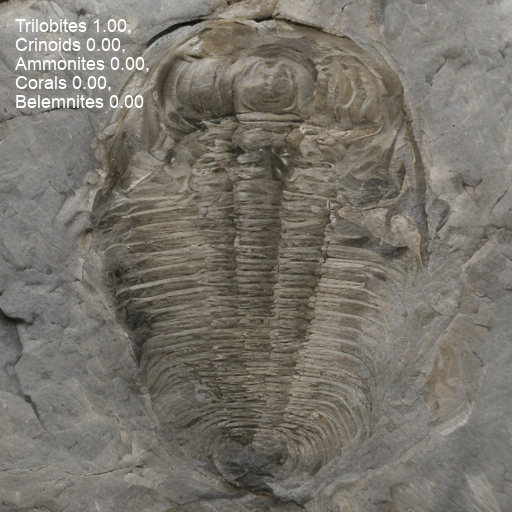

In [ ]:
# Mengakses hasil prediksi pada gambar pertama dalam list
res = res_mod[0]

# Menampilkan gambar dengan label hasil prediksi
res.show()  # Menampilkan gambar dengan label dan confidence

---
# 6. Checking Confusion Matrix Model Output

In [ ]:
from ultralytics import YOLO

# Load model terbaik
model = YOLO('/content/drive/MyDrive/Object_Detection_Model/runs/classify/train4/weights/best.pt')

# Evaluasi model
metrics = model.val()

# Cetak metrik evaluasi
print(metrics)

Ultralytics 8.3.89 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)
YOLOv8s-cls summary (fused): 30 layers, 5,081,605 parameters, 0 gradients, 12.5 GFLOPs
train: /content/drive/MyDrive/Object_Detection_Model/train... found 800 images in 5 classes ✅ 
val: /content/drive/MyDrive/Object_Detection_Model/val... found 100 images in 5 classes ✅ 
test: /content/drive/MyDrive/Object_Detection_Model/test... found 100 images in 5 classes ✅ 


val: Scanning /content/drive/MyDrive/Object_Detection_Model/val... 100 images, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:07<00:00,  1.09s/it]


                   all       0.99          1
Speed: 0.0ms preprocess, 40.7ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/val3
ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78da0c799d90>
curves: []
curves_results: []
fitness: 0.9950000047683716
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.9900000095367432, 'metrics/accuracy_top5': 1.0, 'fitness': 0.9950000047683716}
save_dir: PosixPath('runs/classify/val3')
speed: {'preprocess': 0.0015594999968016054, 'inference': 40.66957347999505, 'loss': 0.00014308000118035125, 'postprocess': 0.00037770999824715545}
task: 'classify'
top1: 0.9900000095367432
top5: 1.0


In [ ]:
import pandas as pd

# Ambil Confusion Matrix
conf_matrix = metrics.confusion_matrix.matrix

# Nama kelas mineral
class_names =['Ammonites', 'Belemnites', 'Corals', 'Crinoids', 'Trilobites']

# Buat dataframe agar lebih rapi
df_cm = pd.DataFrame(conf_matrix, index=class_names, columns=class_names)

# Print tabel Confusion Matrix
print(df_cm)

            Ammonites  Belemnites  Corals  Crinoids  Trilobites
Ammonites        20.0         0.0     0.0       0.0         0.0
Belemnites        0.0        19.0     0.0       0.0         0.0
Corals            0.0         0.0    20.0       0.0         0.0
Crinoids          0.0         1.0     0.0      20.0         0.0
Trilobites        0.0         0.0     0.0       0.0        20.0


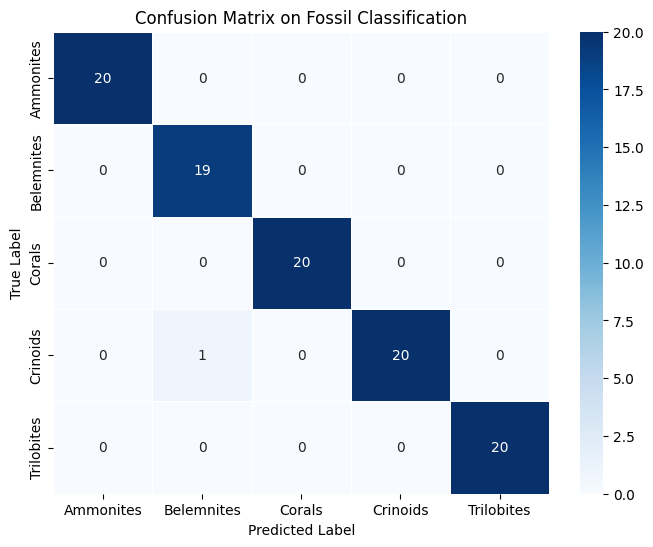

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot Confusion Matrix sebagai heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_cm, annot=True, fmt=".0f", cmap="Blues", linewidths=0.5)

# Labeling
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix on Fossil Classification")
plt.savefig("/content/drive/MyDrive/DL_Object_Detection/conf_matrix.png")
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import precision_recall_fscore_support

# Ambil confusion matrix dari YOLOv8
conf_matrix = metrics.confusion_matrix.matrix

# Hitung jumlah sampel per kelas (ground truth)
true_labels = np.repeat(np.arange(len(conf_matrix)), conf_matrix.sum(axis=1).astype(int))

# Prediksi model berdasarkan confusion matrix
pred_labels = np.concatenate([np.full(int(n), i) for i, n in enumerate(conf_matrix.sum(axis=0))])

# Hitung Precision, Recall, dan F1-Score per kelas
precision, recall, f1, _ = precision_recall_fscore_support(true_labels, pred_labels, average=None)

# Cetak hasil
for i, (p, r, f) in enumerate(zip(precision, recall, f1)):
    print(f"Class {i}: Precision={p:.4f}, Recall={r:.4f}, F1-score={f:.4f}")


Class 0: Precision=1.0000, Recall=1.0000, F1-score=1.0000
Class 1: Precision=0.9500, Recall=1.0000, F1-score=0.9744
Class 2: Precision=0.9500, Recall=0.9500, F1-score=0.9500
Class 3: Precision=1.0000, Recall=0.9524, F1-score=0.9756
Class 4: Precision=1.0000, Recall=1.0000, F1-score=1.0000


In [ ]:
import numpy as np
from sklearn.metrics import precision_recall_fscore_support

# Ambil confusion matrix dari YOLOv8
conf_matrix = metrics.confusion_matrix.matrix

# Hitung jumlah sampel per kelas (ground truth)
true_labels = np.repeat(np.arange(len(conf_matrix)), conf_matrix.sum(axis=1).astype(int))

# Prediksi model berdasarkan confusion matrix
pred_labels = np.concatenate([np.full(int(n), i) for i, n in enumerate(conf_matrix.sum(axis=0))])

# Hitung Precision, Recall, dan F1-Score
precision, recall, f1, _ = precision_recall_fscore_support(true_labels, pred_labels, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Precision: 0.9805
Recall: 0.9800
F1-score: 0.9800
